API Python -Challenge: Part 1: WeatherPy Student: Jorge Alberto Muñozcano Castro

In [8]:
#enable citypy in jupyther enviornment
!pip install citipy

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import datetime as dt  
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#Stablish a list of the varaibles needed for the analyzis (City Name, City Number, Latitude, Longitude Clouds, Humidty, Temperature, Winds)
City_Name = []
City_Number = []
Countries = []
Dates = []
Latitude = []
Longitude = []
Clouds = []
Humidity = []
Temperature = []
Winds = []
#count one by one the list in order to proccess it from the beggining
counter = 1

In [42]:
# extract database using json 
#Citydatainfo = (requests.get(url + "&q=" + city)).json()
#print(Citydatainfo) # test succesffully data extract sucesfully

{'coord': {'lon': -76.2, 'lat': 24.9}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 75.65, 'feels_like': 77.7, 'temp_min': 75.65, 'temp_max': 75.65, 'pressure': 1021, 'humidity': 74, 'sea_level': 1021, 'grnd_level': 1020}, 'wind': {'speed': 7.14, 'deg': 126}, 'clouds': {'all': 39}, 'dt': 1585583276, 'sys': {'country': 'BS', 'sunrise': 1585565867, 'sunset': 1585610407}, 'timezone': -14400, 'id': 3571592, 'name': 'Rock Sound', 'cod': 200}


In [13]:
#Extract the data from the API, and create a loop withe the variables stablished by using the try/except functin to stablish the list 
print("Beginning Data Retrival")
print('------------------------------')
for city in cities:
    try:
        Citydatainfo = (requests.get(url + "&q=" + city)).json()
        City_Name.append(Citydatainfo["name"])
        Dates.append(Citydatainfo["dt"])
        Countries.append(Citydatainfo["sys"]["country"])
        Latitude.append(Citydatainfo["coord"]["lat"])
        Longitude.append(Citydatainfo["coord"]["lon"])
        Clouds.append(Citydatainfo["clouds"]["all"])
        Humidity.append(Citydatainfo["main"]["humidity"])
        Temperature.append(Citydatainfo["main"]["temp"])
        Winds.append(Citydatainfo["wind"]["speed"])
        print(f"City Number {counter} of {len(cities)}: Data complete. | {city} ")
        counter = counter + 1
    except KeyError:
        print(f"City Number {counter} of {len(cities)}: Data Incomplete-City info not found | {city} | Skipping..")
        counter = counter + 1
print('------------------------------')
print("Data Retriveal Complete") #test succesfully Data extracted, analyzed and printed into a list

Beginning Data Retrival
------------------------------
City Number 1 of 614: Data complete. | berlevag 
City Number 2 of 614: Data complete. | punta arenas 
City Number 3 of 614: Data complete. | new norfolk 
City Number 4 of 614: Data complete. | norman wells 
City Number 5 of 614: Data complete. | celestun 
City Number 6 of 614: Data complete. | hilo 
City Number 7 of 614: Data complete. | thompson 
City Number 8 of 614: Data Incomplete-City info not found | taolanaro | Skipping..
City Number 9 of 614: Data complete. | priargunsk 
City Number 10 of 614: Data Incomplete-City info not found | illoqqortoormiut | Skipping..
City Number 11 of 614: Data complete. | cape town 
City Number 12 of 614: Data complete. | nanortalik 
City Number 13 of 614: Data Incomplete-City info not found | nguiu | Skipping..
City Number 14 of 614: Data complete. | yar-sale 
City Number 15 of 614: Data complete. | bluff 
City Number 16 of 614: Data complete. | urengoy 
City Number 17 of 614: Data complete. | v

City Number 151 of 614: Data complete. | provideniya 
City Number 152 of 614: Data complete. | hearst 
City Number 153 of 614: Data complete. | singkang 
City Number 154 of 614: Data complete. | charters towers 
City Number 155 of 614: Data complete. | aswan 
City Number 156 of 614: Data complete. | maldonado 
City Number 157 of 614: Data complete. | mahebourg 
City Number 158 of 614: Data complete. | bilibino 
City Number 159 of 614: Data Incomplete-City info not found | cah ab | Skipping..
City Number 160 of 614: Data Incomplete-City info not found | fevralsk | Skipping..
City Number 161 of 614: Data complete. | vestmannaeyjar 
City Number 162 of 614: Data complete. | saint-pierre 
City Number 163 of 614: Data complete. | mount isa 
City Number 164 of 614: Data Incomplete-City info not found | sorvag | Skipping..
City Number 165 of 614: Data complete. | prado 
City Number 166 of 614: Data complete. | oriximina 
City Number 167 of 614: Data complete. | lagoa 
City Number 168 of 614: D

City Number 303 of 614: Data complete. | coslada 
City Number 304 of 614: Data complete. | churapcha 
City Number 305 of 614: Data complete. | totoral 
City Number 306 of 614: Data complete. | waipawa 
City Number 307 of 614: Data complete. | urambo 
City Number 308 of 614: Data complete. | brigham city 
City Number 309 of 614: Data Incomplete-City info not found | tsihombe | Skipping..
City Number 310 of 614: Data complete. | olafsvik 
City Number 311 of 614: Data complete. | port hardy 
City Number 312 of 614: Data complete. | chuy 
City Number 313 of 614: Data complete. | airai 
City Number 314 of 614: Data complete. | mackay 
City Number 315 of 614: Data complete. | los llanos de aridane 
City Number 316 of 614: Data complete. | koster 
City Number 317 of 614: Data complete. | carman 
City Number 318 of 614: Data complete. | karaman 
City Number 319 of 614: Data complete. | lompoc 
City Number 320 of 614: Data complete. | excelsior springs 
City Number 321 of 614: Data complete. | 

City Number 454 of 614: Data complete. | neyshabur 
City Number 455 of 614: Data complete. | namibe 
City Number 456 of 614: Data complete. | isangel 
City Number 457 of 614: Data complete. | poum 
City Number 458 of 614: Data complete. | banda aceh 
City Number 459 of 614: Data complete. | zeya 
City Number 460 of 614: Data complete. | bogorodskoye 
City Number 461 of 614: Data complete. | aklavik 
City Number 462 of 614: Data Incomplete-City info not found | unye | Skipping..
City Number 463 of 614: Data complete. | irbeyskoye 
City Number 464 of 614: Data Incomplete-City info not found | ngukurr | Skipping..
City Number 465 of 614: Data complete. | hamilton 
City Number 466 of 614: Data complete. | byron bay 
City Number 467 of 614: Data complete. | fredericksburg 
City Number 468 of 614: Data complete. | kumluca 
City Number 469 of 614: Data complete. | umtata 
City Number 470 of 614: Data complete. | zhovtneve 
City Number 471 of 614: Data complete. | mweka 
City Number 472 of 614

City Number 609 of 614: Data complete. | carmen 
City Number 610 of 614: Data complete. | kurumkan 
City Number 611 of 614: Data complete. | okrika 
City Number 612 of 614: Data complete. | salina cruz 
City Number 613 of 614: Data complete. | xining 
City Number 614 of 614: Data complete. | rock sound 
------------------------------
Data Retriveal Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#Create a dataframe with the previouse lists
cityweatherforcast = pd.DataFrame({"City": City_Name, "Cloudiness": Clouds,"Country":Countries, "Date": Dates,
                                   "Humidity": Humidity,"Latitude": Latitude,"Longitude": Longitude,
                                   "Temp": Temperature,"Winds Speed": Winds
                                   })

In [15]:
#count the total number of data that is in the
City_Count=cityweatherforcast.count()
City_Count # test succesfuly data  was counted per each variable

City           564
Cloudiness     564
Country        564
Date           564
Humidity       564
Latitude       564
Longitude      564
Temp           564
Winds Speed    564
dtype: int64

In [16]:
#display dataframe with new data
cityweatherforcast.head() #test succesfully new data frame was created per previouse variables

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temp,Winds Speed
0,Berlevåg,75,NO,1585581254,79,70.86,29.09,21.20,11.41
1,Punta Arenas,75,CL,1585581254,66,-53.15,-70.92,50.38,23.04
2,New Norfolk,50,AU,1585581254,62,-42.78,147.06,50.29,6.93
3,Norman Wells,5,CA,1585581254,74,65.28,-126.83,-27.40,8.05
4,Celestún,0,MX,1585581255,71,20.87,-90.40,80.69,9.46


In [17]:
#Export data frame to the output folder
pd.DataFrame.to_csv(cityweatherforcast, "../output_data/cityweatherforcast.csv") #test succesfully data frame was saved in the output folder

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

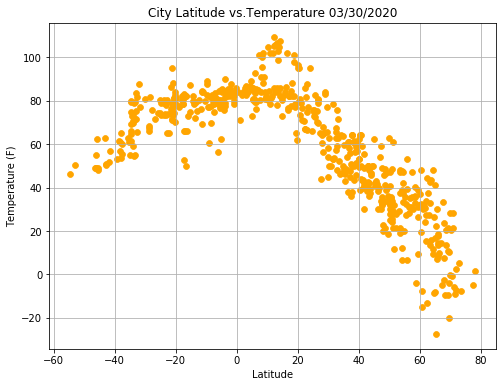

In [18]:
# Create Scatter plot chart analyzing the latitude vs tempereture of the cities, adding label, format and adding the date that the data was analyzed
#Stablish the date time of the analyze
currentdate=dt.datetime.today().strftime("%m/%d/%Y")
# Plot the scatter plot with aLL the respective labels and formats
plt.figure(figsize=(8,6))
plt.scatter(x = cityweatherforcast["Latitude"], y = cityweatherforcast["Temp"], linewidths = 0.75 , color = "orange", s=35)
plt.title(f"City Latitude vs.Temperature {currentdate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.savefig("../output_data/Citytemp.png") #print succesfull plot chart created with labels and formate, succesfully export to the output folder

#### Latitude vs. Humidity Plot

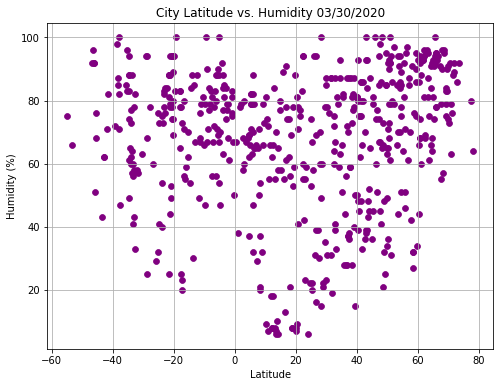

In [19]:
# Create Scatter plot chart analyzing the latitude vs tempereture of the cities, adding label, format and adding the date that the data was analyzed
# Plot the scatter plot with aLL the respective labels and formats
plt.figure(figsize=(8,6))
plt.scatter(x = cityweatherforcast["Latitude"], y = cityweatherforcast["Humidity"], linewidths = 0.75 , color = "purple", s=35)
plt.title(f"City Latitude vs. Humidity {currentdate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("../output_data/Cityhum.png")#print succesfull plot chart created with labels and formate, succesfully export to the output folder

#### Latitude vs. Cloudiness Plot

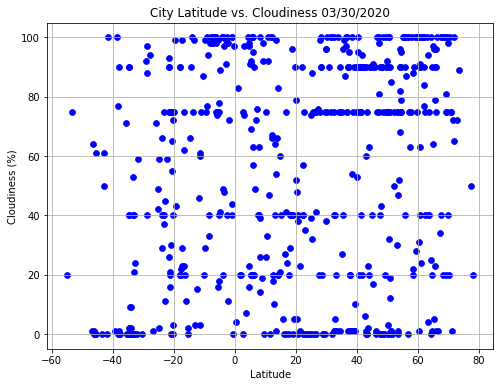

In [20]:
# Create Scatter plot chart analyzing the latitude vs tempereture of the cities, adding label, format and adding the date that the data was analyzed
# Plot the scatter plot with aLL the respective labels and formats
plt.figure(figsize=(8,6))
plt.scatter(x = cityweatherforcast["Latitude"], y = cityweatherforcast["Cloudiness"], linewidths = 0.75 , color = "blue", s=35)
plt.title(f"City Latitude vs. Cloudiness {currentdate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("../output_data/Citycloud.png")#print succesfull plot chart created with labels and formate, succesfully export to the output folder

#### Latitude vs. Wind Speed Plot

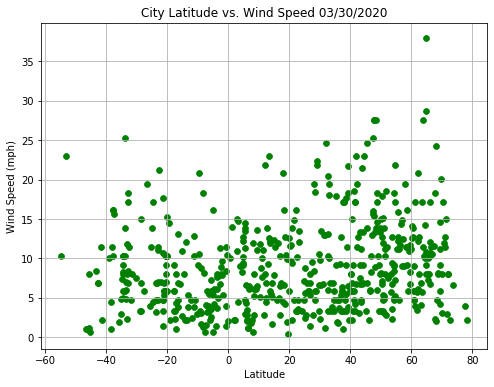

In [21]:
# Create Scatter plot chart analyzing the latitude vs tempereture of the cities, adding label, format and adding the date that the data was analyzed
# Plot the scatter plot with aLL the respective labels and formats
plt.figure(figsize=(8,6))
plt.scatter(x = cityweatherforcast["Latitude"], y = cityweatherforcast["Winds Speed"], linewidths = 0.75 , color = "green", s=35)
plt.title(f"City Latitude vs. Wind Speed {currentdate}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("../output_data/Citywind.png")#print succesfull plot chart created with labels and formate, succesfully export to the output folder

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern Hemisphere DataFrames
cityweatherforcastnh = cityweatherforcast.loc[cityweatherforcast["Latitude"] >= 0.0]
cityweatherforcastnh.reset_index(inplace=True)
cityweatherforcastnh #test sucesfully data frame generated

,index,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temp,Winds Speed
0,0,Berlevåg,75,NO,1585581254,79,70.86,29.09,21.20,11.41
1,3,Norman Wells,5,CA,1585581254,74,65.28,-126.83,-27.40,8.05
2,4,Celestún,0,MX,1585581255,71,20.87,-90.40,80.69,9.46
3,5,Hilo,90,US,1585581255,88,19.73,-155.09,61.75,5.82
4,6,Thompson,90,CA,1585581116,71,55.74,-97.86,6.80,12.75
...,...,...,...,...,...,...,...,...,...,...
383,559,Kurumkan,82,RU,1585581424,86,54.30,110.30,20.21,4.97
384,560,Okrika,98,NG,1585581425,62,4.74,7.08,89.29,9.19
385,561,Salina Cruz,0,MX,1585581425,55,16.17,-95.20,86.52,12.01
386,562,Xining,100,CN,1585581425,28,36.62,101.77,38.03,9.28


In [23]:
pd.DataFrame.to_csv(cityweatherforcastnh, "../output_data/Nhweatherforcast.csv") #test succesfull database export into the output folder

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots for Norther Hemisphere dataframe
#Stablished stats for Northern Hemisphere latitude and Temperature
print("Northern Hemisphere Latitude vs Temperature stats")
corr=round(st.pearsonr(cityweatherforcastnh["Latitude"],cityweatherforcastnh["Temp"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(cityweatherforcastnh['Latitude'],cityweatherforcastnh['Temp'])
print(f"The {Lin_Reg}")
#Test succesfully data printed

Northern Hemisphere Latitude vs Temperature stats
The correlation is -0.91
The LinregressResult(slope=-1.284346199226596, intercept=101.07852965367212, rvalue=-0.9064963929950913, pvalue=1.2769579751209094e-146, stderr=0.03044770396435703)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

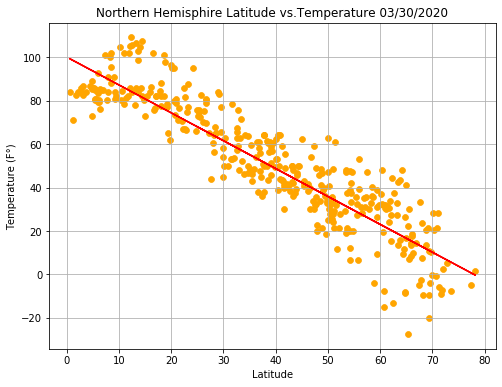

In [45]:
#Stablished the slope, intercept and rvalue into variabes, in order to create the line regression into de plot
slope=-1.284346199226596
intercept=101.07852965367212 
rvalue=-0.9064963929950913
lineregresionweather = cityweatherforcastnh["Latitude"]*slope+intercept+rvalue
# Plot the scatter plot with line regression with aLL the respective labels and formats
plt.figure(figsize=(8,6))
plt.scatter(x = cityweatherforcastnh["Latitude"], y = cityweatherforcastnh["Temp"], linewidths = 0.75 , color = "orange", s=35)
plt.plot(cityweatherforcastnh["Latitude"],lineregresionweather,color="red", label=True)
plt.title(f"Northern Hemisphire Latitude vs.Temperature {currentdate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(True)
plt.savefig("../output_data/NHTemp.png") #test succesfully chart generated and exported into the output folder

In [26]:
#Stablished stats for Northern Hemisphere latitude and Humidity
print("Northern Hemisphere Latitude vs Humidity stats")
corr=round(st.pearsonr(cityweatherforcastnh["Latitude"],cityweatherforcastnh["Humidity"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(cityweatherforcastnh["Latitude"],cityweatherforcastnh["Humidity"])
print(f"The {Lin_Reg}")
#Test succesfully data printed

Northern Hemisphere Latitude vs Humidity stats
The correlation is 0.38
The LinregressResult(slope=0.4582338472067546, intercept=47.82856132544558, rvalue=0.3806846060635248, pvalue=7.91872622789655e-15, stderr=0.056654104094768995)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

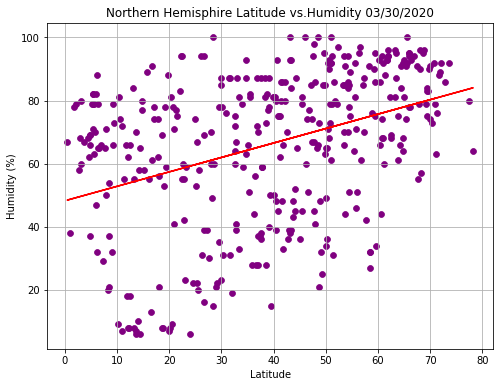

In [46]:
#Stablished the slope, intercept and rvalue into variabes, in order to create the line regression into de plot
slope=0.4582338472067546
intercept=47.82856132544558
rvalue=0.3806846060635248
lineregresionweather = cityweatherforcastnh["Latitude"]*slope+intercept+rvalue
#Plot the scatter plot with line regression with aLL the respective labels and formats
plt.figure(figsize=(8,6))
plt.scatter(x = cityweatherforcastnh["Latitude"], y = cityweatherforcastnh["Humidity"], linewidths = 0.75 , color = "purple", s=35)
plt.plot(cityweatherforcastnh["Latitude"],lineregresionweather,color="red", label=True)
plt.title(f"Northern Hemisphire Latitude vs.Humidity {currentdate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("../output_data/NHHum.png") #test succesfully chart generated and exported into the output folder

In [44]:
#Stablished stats for Northern Hemisphere latitude and Cloudiness
print("Northern Hemisphere Latitude vs Cloudiness stats")
corr=round(st.pearsonr(cityweatherforcastnh["Latitude"],cityweatherforcastnh["Cloudiness"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(cityweatherforcastnh["Latitude"],cityweatherforcastnh["Cloudiness"])
print(f"The {Lin_Reg}")
#Test succesfully data printed

Northern Hemisphere Latitude vs Cloudiness stats
The correlation is 0.17
The LinregressResult(slope=0.3034206000310707, intercept=44.6972223215499, rvalue=0.1652503903420716, pvalue=0.0010867757434370187, stderr=0.09217150044793303)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

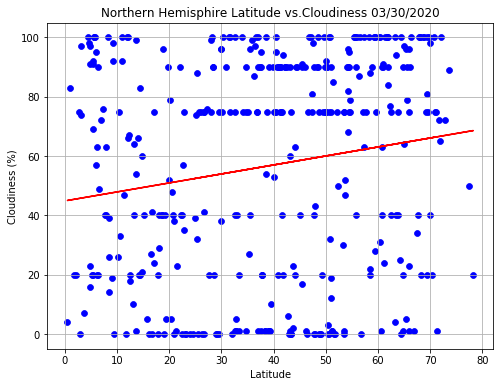

In [47]:
#Stablished the slope, intercept and rvalue into variabes, in order to create the line regression into de plot
slope=0.3034206000310707
intercept=44.6972223215499
rvalue=0.1652503903420716
lineregresionweather = cityweatherforcastnh["Latitude"]*slope+intercept+rvalue
# Plot the scatter plot with line regression with aLL the respective labels and formats
plt.figure(figsize=(8,6))
plt.scatter(x = cityweatherforcastnh["Latitude"], y = cityweatherforcastnh["Cloudiness"], linewidths = 0.75 , color = "blue", s=35)
plt.plot(cityweatherforcastnh["Latitude"],lineregresionweather,color="red", label=True)
plt.title(f"Northern Hemisphire Latitude vs.Cloudiness {currentdate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("../output_data/NHCloud.png")#test succesfully chart generated and exported into the output folder

In [43]:
#Stablished stats for Northern Hemisphere latitude and Wind Speed
print("Norther Hemisphere Latitude vs Wind Speed")
corr=round(st.pearsonr(cityweatherforcastnh["Latitude"],cityweatherforcastnh["Winds Speed"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(cityweatherforcastnh['Latitude'],cityweatherforcastnh["Winds Speed"])
print(f"The {Lin_Reg}")
#Test succesfully data printed

Norther Hemisphere Latitude vs Wind Speed
The correlation is 0.17
The LinregressResult(slope=0.049380154616358224, intercept=7.6079938065185555, rvalue=0.1689195698648641, pvalue=0.0008358821440380067, stderr=0.014665357994487814)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

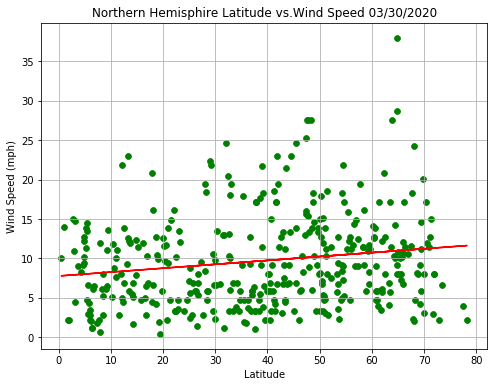

In [48]:
#Stablished the slope, intercept and rvalue into variabes, in order to create the line regression into de plot
slope=0.049380154616358224
intercept=7.6079938065185555
rvalue=0.1689195698648641
lineregresionweather = cityweatherforcastnh["Latitude"]*slope+intercept+rvalue
# Plot the scatter plot with line regression with aLL the respective labels and formats
plt.figure(figsize=(8,6))
plt.scatter(x = cityweatherforcastnh["Latitude"], y = cityweatherforcastnh["Winds Speed"], linewidths = 0.75 , color = "green", s=35)
plt.plot(cityweatherforcastnh["Latitude"],lineregresionweather,color="red", label=True)
plt.title(f"Northern Hemisphire Latitude vs.Wind Speed {currentdate}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("../output_data/NHWind.png") #test succesfully chart generated and exported into the output folder

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Southern Hemisphere DataFrames
cityweatherforcastsh = cityweatherforcast.loc[cityweatherforcast["Latitude"] < 0.0]
cityweatherforcastsh.reset_index(inplace=True)
cityweatherforcastsh

,index,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temp,Winds Speed
0,1,Punta Arenas,75,CL,1585581254,66,-53.15,-70.92,50.38,23.04
1,2,New Norfolk,50,AU,1585581254,62,-42.78,147.06,50.29,6.93
2,8,Cape Town,9,ZA,1585581250,60,-33.93,18.42,69.84,25.28
3,11,Bluff,1,NZ,1585581019,92,-46.60,168.33,48.99,1.01
4,13,Vaini,75,TO,1585581258,88,-21.20,-175.20,78.80,5.82
...,...,...,...,...,...,...,...,...,...,...
171,531,Ifanadiana,16,MG,1585581417,79,-21.30,47.63,71.82,1.43
172,532,Rio Grande,0,BR,1585581415,58,-32.03,-52.10,87.80,4.70
173,543,Gombong,100,ID,1585581419,83,-7.61,109.51,79.90,0.65
174,544,Manokwari,100,ID,1585581420,75,-0.87,134.08,80.11,1.48


In [33]:
pd.DataFrame.to_csv(cityweatherforcastsh, "../output_data/Shweatherforcast.csv") #test succesfull database export into the output folder

In [34]:
#Stablished stats for Southern Hemisphere latitude and Temperature
print("Southern Hemisphere Latitude vs Temperature stats")
corr=round(st.pearsonr(cityweatherforcastsh["Latitude"],cityweatherforcastsh["Temp"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(cityweatherforcastsh["Latitude"],cityweatherforcastsh["Temp"])
print(f"The {Lin_Reg}")
#Test succesfully data printed

Southern Hemisphere Latitude vs Temperature stats
The correlation is 0.69
The LinregressResult(slope=0.5551900906834017, intercept=85.47665670357219, rvalue=0.6861181700825834, pvalue=7.940079513933356e-26, stderr=0.04462674932646465)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

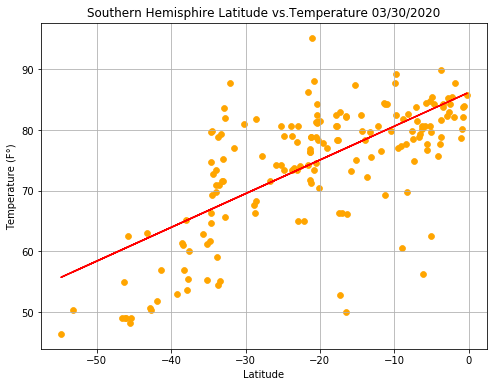

In [49]:
#Stablished the slope, intercept and rvalue into variabes, in order to create the line regression into de plot
slope=0.5551900906834017
intercept=85.47665670357219
rvalue=0.6861181700825834
lineregresionweathersh = cityweatherforcastsh["Latitude"]*slope+intercept+rvalue
# Plot the scatter plot with line regression with aLL the respective labels and formats
plt.figure(figsize=(8,6))
plt.scatter(x = cityweatherforcastsh["Latitude"], y = cityweatherforcastsh["Temp"], linewidths = 0.75 , color = "orange", s=35)
plt.plot(cityweatherforcastsh["Latitude"],lineregresionweathersh,color="red", label=True)
plt.title(f"Southern Hemisphire Latitude vs.Temperature {currentdate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(True)
plt.savefig("../output_data/SHTemp.png") #test succesfully chart generated and exported into the output folder

In [36]:
#Stablished stats for Southern Hemisphere latitude and Humidity
print("Southern Hemisphere Latitude vs Humidity stats")
corr=round(st.pearsonr(cityweatherforcastsh["Latitude"],cityweatherforcastsh["Humidity"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(cityweatherforcastsh["Latitude"],cityweatherforcastsh["Humidity"])
print(f"The {Lin_Reg}")
#Test succesfully data printed

Southern Hemisphere Latitude vs Humidity stats
The correlation is 0.05
The LinregressResult(slope=0.0629606560428855, intercept=73.38855473063708, rvalue=0.047610268051541296, pvalue=0.530346688194629, stderr=0.10013853174797015)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

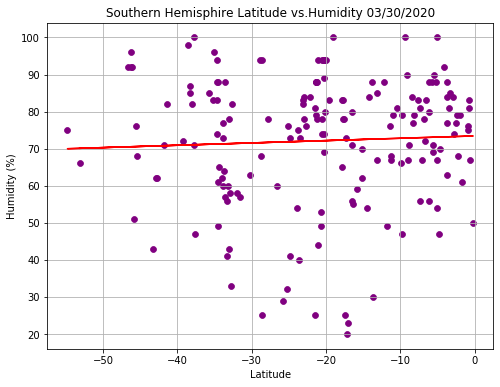

In [50]:
#Stablished the slope, intercept and rvalue into variabes, in order to create the line regression into de plot
slope=0.0629606560428855
intercept=73.38855473063708
rvalue=0.047610268051541296,
lineregresionweathersh = cityweatherforcastsh["Latitude"]*slope+intercept+rvalue
# Plot the scatter plot with line regression with aLL the respective labels and formats
plt.figure(figsize=(8,6))
plt.scatter(x = cityweatherforcastsh["Latitude"], y = cityweatherforcastsh["Humidity"], linewidths = 0.75 , color = "purple", s=35)
plt.plot(cityweatherforcastsh["Latitude"],lineregresionweathersh,color="red", label=True)
plt.title(f"Southern Hemisphire Latitude vs.Humidity {currentdate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("../output_data/SHHum.png") #test succesfully chart generated and exported into the output folder

In [38]:
#Stablished stats for Southern Hemisphere latitude and Cloudiness
print("Southern Hemisphere Latitude vs Cloudiness stats")
corr=round(st.pearsonr(cityweatherforcastsh["Latitude"],cityweatherforcastsh["Cloudiness"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(cityweatherforcastsh["Latitude"],cityweatherforcastsh["Cloudiness"])
print(f"The {Lin_Reg}")
#Test succesfully data printed

Southern Hemisphere Latitude vs Cloudiness stats
The correlation is 0.43
The LinregressResult(slope=1.2002471616282142, intercept=74.74400235130659, rvalue=0.4307643668486113, pvalue=2.406608818845733e-09, stderr=0.19062786744820384)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

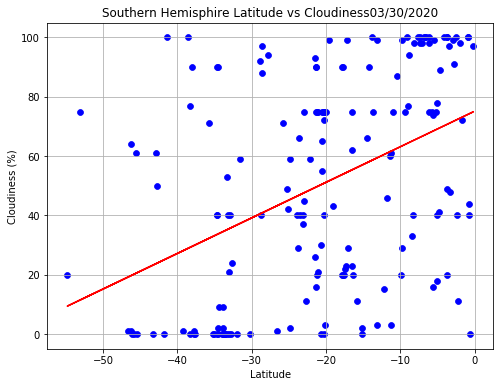

In [51]:
#Stablished the slope, intercept and rvalue into variabes, in order to create the line regression into de plot
slope=1.2002471616282142
intercept=74.74400235130659
rvalue=0.4307643668486113
lineregresionweathersh = cityweatherforcastsh["Latitude"]*slope+intercept+rvalue
# Plot the scatter plot with line regression with aLL the respective labels and formats
plt.figure(figsize=(8,6))
plt.scatter(x = cityweatherforcastsh["Latitude"], y = cityweatherforcastsh["Cloudiness"], linewidths = 0.75 , color = "blue", s=35)
plt.plot(cityweatherforcastsh["Latitude"],lineregresionweathersh,color="red", label=True)
plt.title(f"Southern Hemisphire Latitude vs Cloudiness{currentdate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("../output_data/SHCloud.png")#test succesfully chart generated and exported into the output folder

In [40]:
#Stablished stats for Southern Hemisphere latitude and Wind Speed
print("Southern Hemisphere Latitude vs Wind Speed stats")
corr=round(st.pearsonr(cityweatherforcastsh["Latitude"],cityweatherforcastsh["Winds Speed"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(cityweatherforcastsh['Latitude'],cityweatherforcastsh['Winds Speed'])
print(f"The {Lin_Reg}")
#Test succesfully data printed

Southern Hemisphere Latitude vs Wind Speed stats
The correlation is -0.16
The LinregressResult(slope=-0.05904171848616114, intercept=6.109798543837722, rvalue=-0.16249019545347762, pvalue=0.031188772322788112, stderr=0.027179834240281153)


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

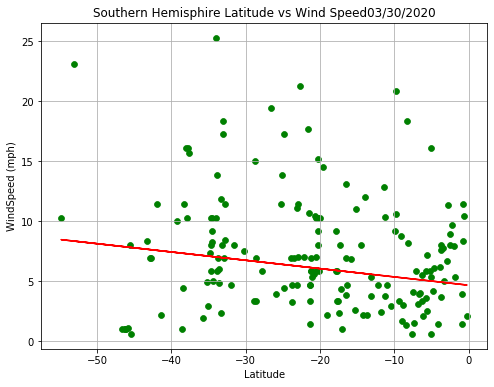

In [41]:
#Stablished the slope, intercept and rvalue into variabes, in order to create the line regression into de plot
slope=-0.05904171848616114
intercept=6.109798543837722
rvalue=-0.16249019545347762
lineregresionweathersh = cityweatherforcastsh["Latitude"]*slope+intercept+rvalue
# Plot the scatter plot with line regression with aLL the respective labels and formats
plt.figure(figsize=(8,6))
plt.scatter(x = cityweatherforcastsh["Latitude"], y = cityweatherforcastsh["Winds Speed"], linewidths = 0.75 , color = "green", s=35)
plt.plot(cityweatherforcastsh["Latitude"],lineregresionweathersh,color="red", label=True)
plt.title(f"Southern Hemisphire Latitude vs Wind Speed{currentdate}")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed (mph)")
plt.grid(True)
plt.savefig("../output_data/SHtwind.png")#test succesfully chart generated and exported into the output folder

Data Insight Analysis:

The following trends were found after deep analyze the weather data of 563 citie from the weather API:

1°) The Temperature are lower in the 388 cities located in the Northern Hemisphire (Latitudes 80 to 40) are experiencing temperature inside 40 to -20°F. The Norther Hemisphere temperature has a slight negative correlation of -0.91,which means  the Northern Hemisphere are in the middle of transition from winter to spring 
On the other hand, 176 cities that are located in the center fo the world (Latitudes 40 to -20)  and Southern Hemispire(-20 to  -60) are having more warmers temperatures ranging 60° to 120° F degrees. The Southern Hemisphere temperature has a slight postive corralation of 0.69, which means that are in the middle of transition between summer to atuum. (see citytempchart, NortherHemisptempchart, SoutherHemisphertempchart).

2°) The Humidtiy and Cloudiness is extemely hight in most of the cities in the Northern Hemisphere (Latitudes 80 to 40) ranging 20 to 100% Humidity and 20 to 100% of cloudiness. The Northern Hemisphere Humidity and Cloudines has a slight positive coraltions on both of 0.38 and 0.17. This means that as long as they transition to spring the probabiity of raining is high.
On the other hand, Soutehrn Hempsihpere (Latitudes -20 to -80) has slight amount of cities with high humidity and Cloudines ranging between the  20 to 100% and 20 to 100%. The Southern Hemisphere Humidity has a postive coralation of 0.43, but the Cloudiness has a negative coralation of -0.16. This means the humidity is going to be high, but the chances of raining are going to be loweer. The cities that are located in the center ( Latitudes 40 to to -0) has the lower % of humidity and cloudiness, expecting nice suny days without a cloud. (see cityhumpchart, NortherHemisphumchart, SoutherHemispherhumchart, citycloudchart, NortherHemispcloudchart, SoutherHemisphercloudchart).

3°)The Winds speed gained in the Northern Hemisphere (Latitudes 80 to 40) are higher rangin betwee 5 to 30 mph. The Northern Hemisphere winds has a positive coralation of 0.17. That means the wind still blowing hard and cold in this side of the hemisphere. On the other hand the Southern Hemisphere has a slight amount of cities with winds blowin between 5 to 30 mph. The Southern Hemisphere has a negative coralation of -0.16,. Therefore the winds that are blowing are probably are warmer in some cities thatn others. In the cities that are locates in the center have wind ranging 15 to 0 mph, making more suitable places to be.

In conclusion, we can infere that best cities that have the better weeather are those who are neraby the center onf the world experiencing nice temperature among 60° to 80° F, with a Humidity and Cloudines between 0 to 20% and winds blowin between 0 to 15 mph. This info would be useful for those who are planning their next vacation.
